In [12]:
from pharynx_analysis import (pharynx_io as pio, image_processing as ip, experiment, plots, profile_processing)
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from importlib import reload
from skimage import measure, transform
from collections import namedtuple
import pdb
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import scale
import skimage
import logging
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import seaborn as sns
from skfda import FDataGrid
import skfda
from statsmodels.stats.weightstats import DescrStatsW
from scipy import signal
import matlab.engine
import matlab
import pandas as pd
from pathlib import Path


reload(logging)
reload(experiment)
reload(pio)
reload(ip)
reload(plots)
reload(profile_processing)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

In [13]:
exp_dir = "/Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47"
imaging_scheme = "TL/470/410/470/410"
ex = experiment.CataExperiment(exp_dir, imaging_scheme)
ex.full_pipeline()

09:43:19 INFO:Starting full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
09:43:19 INFO:Loading Images
09:43:19 INFO:Segmenting pharynxes
09:43:22 INFO:Centering and rotating pharynxes
100%|██████████| 123/123 [00:07<00:00, 16.59it/s]
09:43:31 INFO:Calculating midlines
100%|██████████| 123/123 [00:01<00:00, 121.35it/s]
09:43:32 INFO:Measuring under midlines
100%|██████████| 123/123 [00:03<00:00, 33.19it/s]
09:43:35 INFO:Trimming intensity data
09:43:36 INFO:Calculating redox measurements
09:43:36 INFO:Finished full Cata pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47


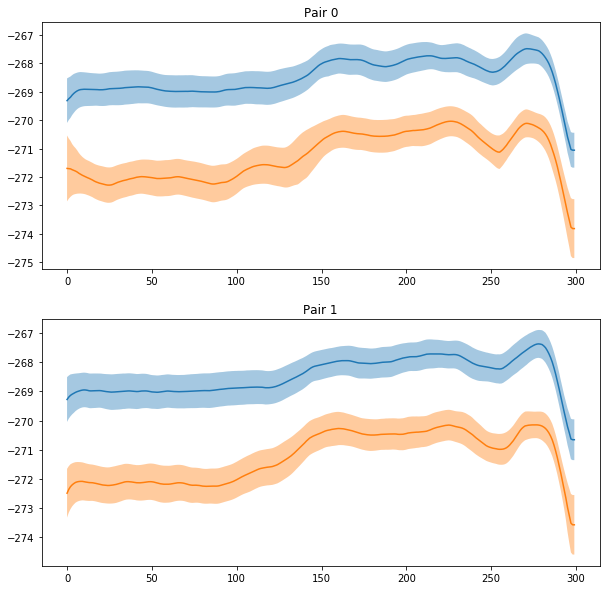

In [16]:
plots.plot_average_by_strain_and_pair(ex.trimmed_raw_profiles.sel(wavelength='e'));